In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Load dataset
df = pd.read_csv('/content/All_India_Index_july2019_20Aug2020.csv')
import pandas as pd

# Remove extra spaces
df['Month'] = df['Month'].str.strip()

# Let pandas infer month automatically (no format)
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], errors='coerce')

# Drop rows that could not be converted
df = df.dropna(subset=['Date'])

# Set index
df.set_index('Date', inplace=True)

# Keep only major food categories
categories = [
    'Cereals and products',
    'Meat and fish',
    'Egg',
    'Milk and products',
    'Oils and fats',
    'Fruits',
    'Vegetables',
    'Pulses and products',
    'Sugar and Confectionery',
    'Spices'
]
df_food = df[categories]

# Check the cleaned dataset
print(df_food.head())


            Cereals and products  Meat and fish    Egg  Milk and products  \
Date                                                                        
2013-01-01                 107.5          106.3  108.1              104.9   
2013-01-01                 110.5          109.1  113.0              103.6   
2013-01-01                 108.4          107.3  110.0              104.4   
2013-02-01                 109.2          108.7  110.2              105.4   
2013-02-01                 112.9          112.9  116.9              104.0   

            Oils and fats  Fruits  Vegetables  Pulses and products  \
Date                                                                 
2013-01-01          106.1   103.9       101.9                106.1   
2013-01-01          103.4   102.3       102.9                105.8   
2013-01-01          105.1   103.2       102.2                106.0   
2013-02-01          106.7   104.0       102.4                105.9   
2013-02-01          103.5   103.1       

/tmp/ipython-input-2396180714.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], errors='coerce')


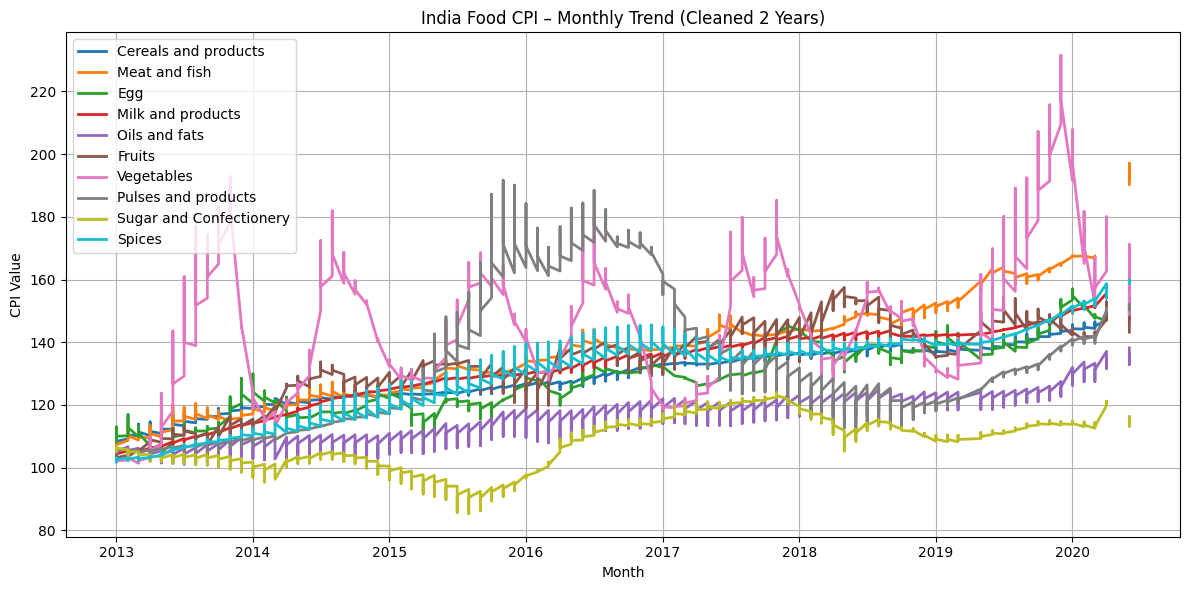

In [21]:
import matplotlib.pyplot as plt

# 1️⃣ Line Chart – Monthly Trends (All Categories)
plt.figure(figsize=(12,6))
for cat in df_food.columns:
    plt.plot(df_food.index, df_food[cat], label=cat, linewidth=2)
plt.title('India Food CPI – Monthly Trend (Cleaned 2 Years)')
plt.xlabel('Month')
plt.ylabel('CPI Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



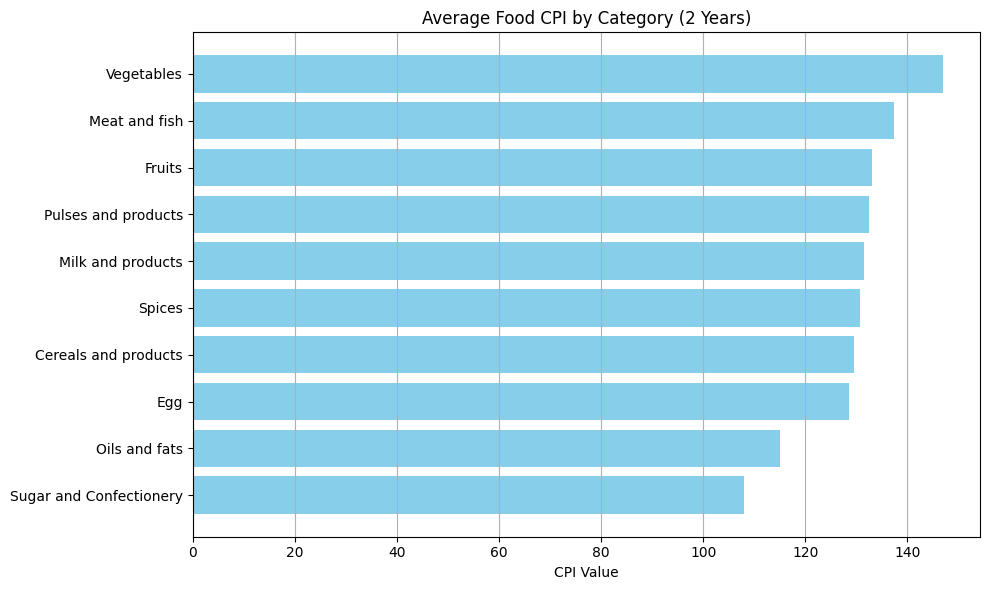

In [22]:

# 2️⃣ Horizontal Bar Chart – Average CPI per Category
avg_cpi = df_food.mean().sort_values()
plt.figure(figsize=(10,6))
plt.barh(avg_cpi.index, avg_cpi.values, color='skyblue')
plt.title('Average Food CPI by Category (2 Years)')
plt.xlabel('CPI Value')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


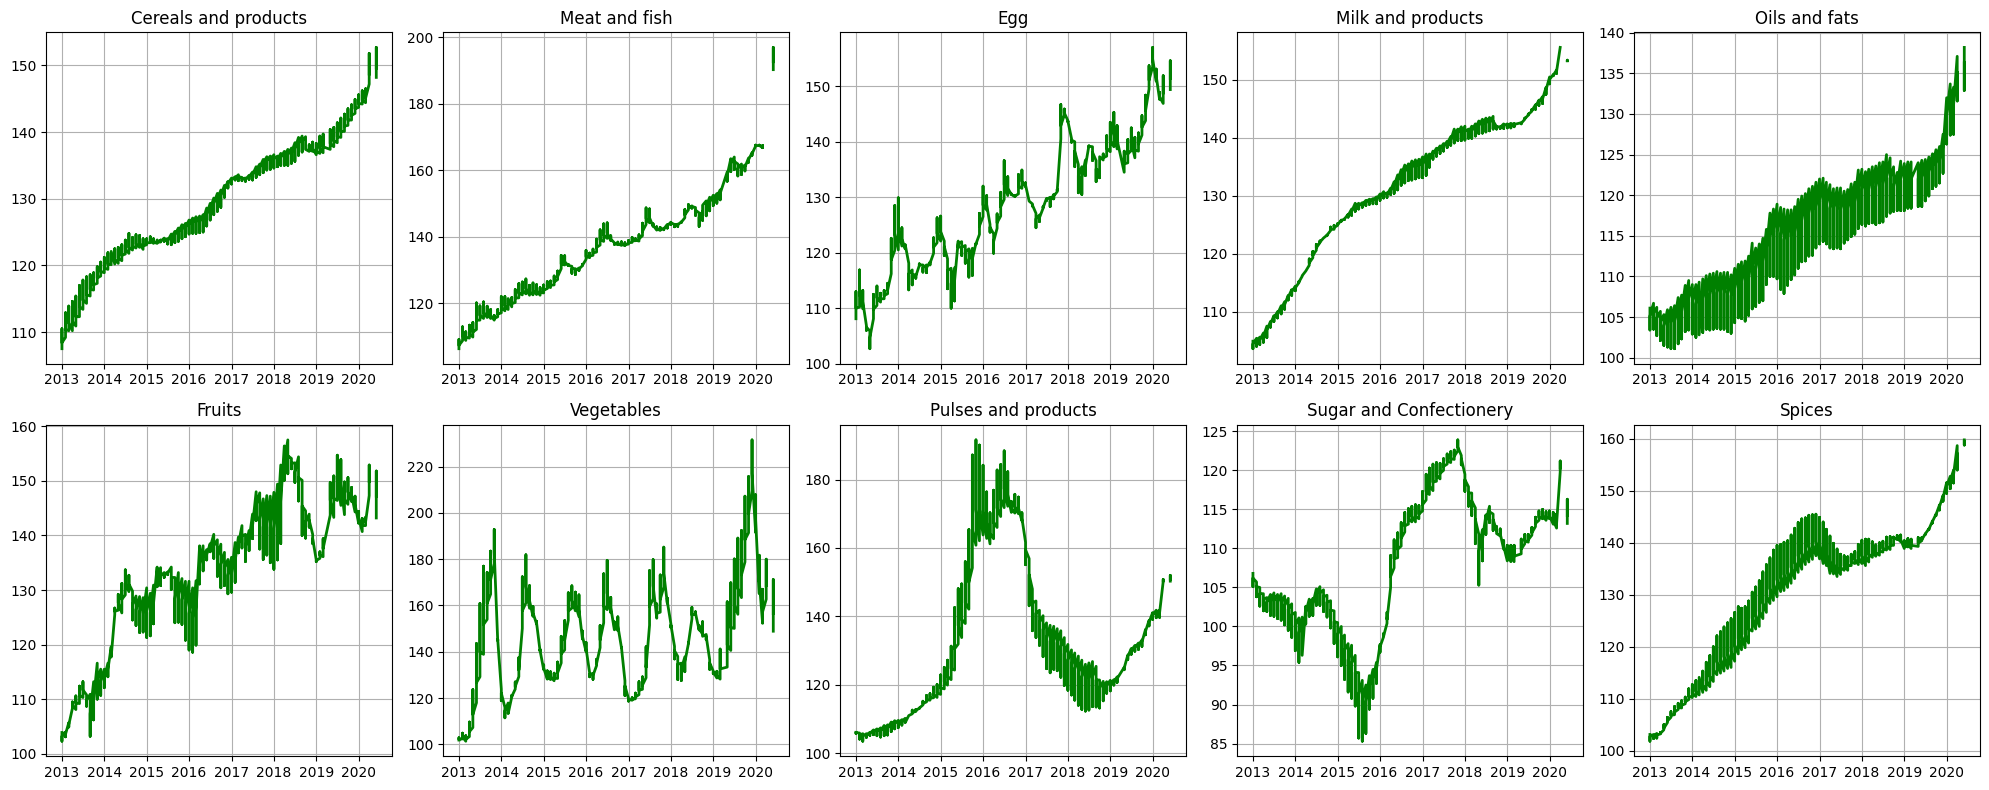

In [23]:
# 3️⃣ Subplot Dashboard – Each Category Individually
fig, axs = plt.subplots(2,5, figsize=(20,8))
axs = axs.flatten()
for i, cat in enumerate(df_food.columns):
    axs[i].plot(df_food.index, df_food[cat], color='green', linewidth=2)
    axs[i].set_title(cat)
    axs[i].grid(True)
plt.tight_layout()
plt.show()

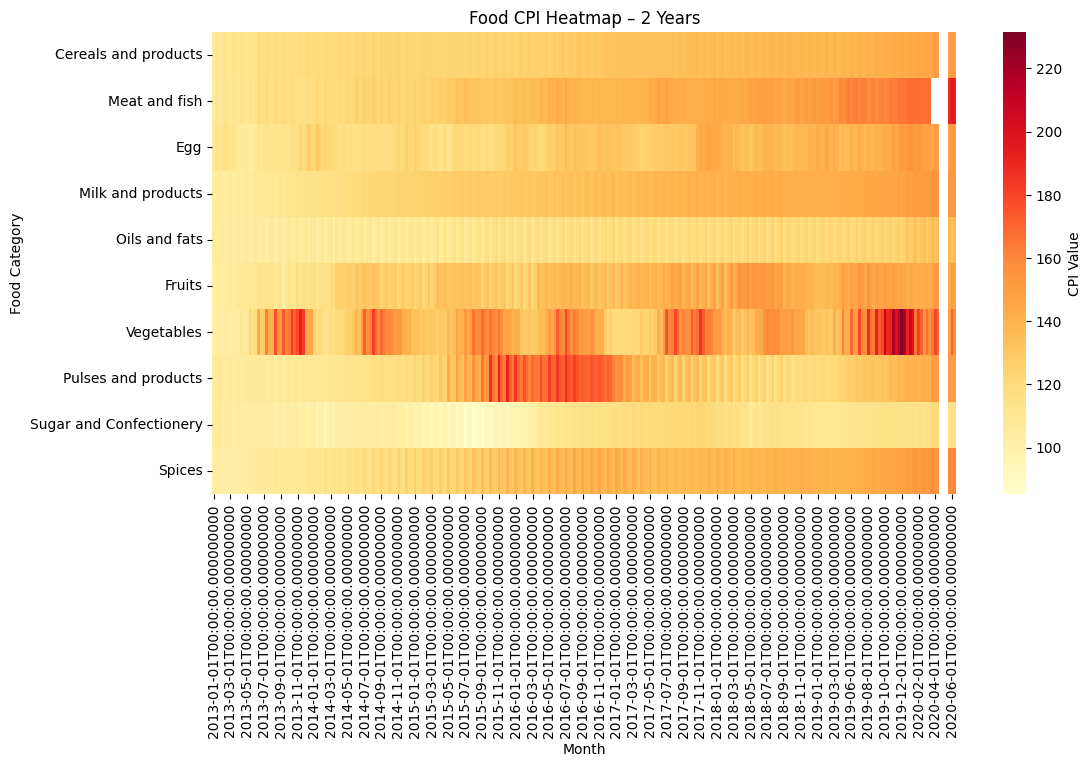

In [24]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(df_food.T, cmap='YlOrRd', cbar_kws={'label': 'CPI Value'})
plt.title('Food CPI Heatmap – 2 Years')
plt.xlabel('Month')
plt.ylabel('Food Category')
plt.show()


/tmp/ipython-input-4108111328.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_pct = df_food.pct_change()*100  # % change


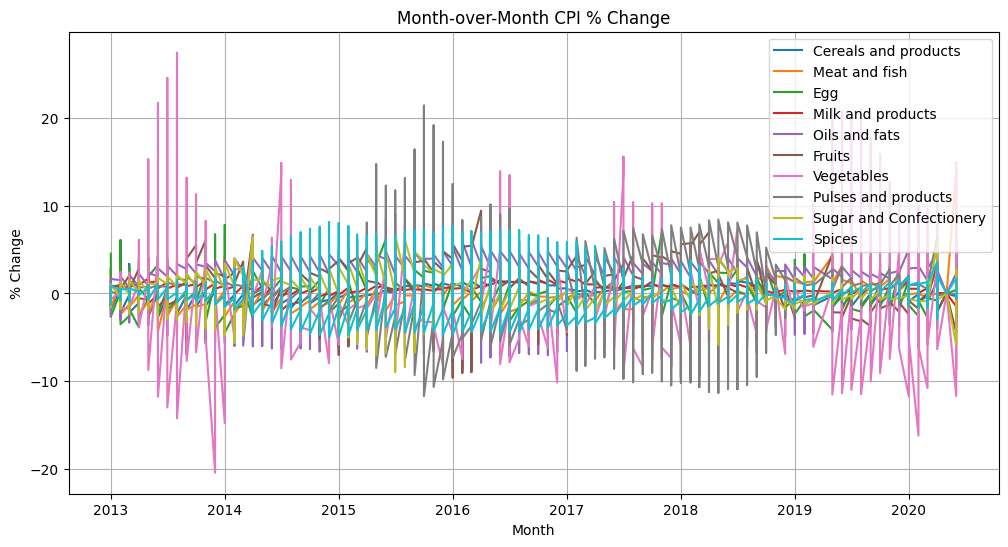

In [25]:
df_pct = df_food.pct_change()*100  # % change
plt.figure(figsize=(12,6))
for cat in df_pct.columns:
    plt.plot(df_pct.index, df_pct[cat], label=cat)
plt.title('Month-over-Month CPI % Change')
plt.xlabel('Month')
plt.ylabel('% Change')
plt.legend()
plt.grid(True)
plt.show()
